In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("./Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

In [26]:
data.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [27]:
data.dtypes

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

In [28]:
data.isnull().any()

hour_beginning       False
location             False
Pedestrians          False
Towards Manhattan    False
Towards Brooklyn     False
weather_summary       True
temperature           True
precipitation         True
lat                  False
long                 False
events                True
Location1            False
dtype: bool

### 1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [ ]:
# Extract the time and convert it to weekday
data["hour_beginning"]=pd.to_datetime(data["hour_beginning"])

In [30]:
data['weekday']=data['hour_beginning'].map(lambda x:x.day_name())

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
 12  weekday            16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory 

In [32]:
data['weekday']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4          Monday
           ...   
16052      Friday
16053    Thursday
16054    Saturday
16055     Tuesday
16056      Monday
Name: weekday, Length: 16057, dtype: object

In [33]:
data = data.drop(data[data['weekday']=="Saturday"].index)
data = data.drop(data[data['weekday']=="Sunday"].index)

In [34]:
data["weekday"].value_counts()

weekday
Tuesday      2328
Monday       2304
Wednesday    2280
Thursday     2280
Friday       2280
Name: count, dtype: int64

In [35]:
# Counting the number of days per day from Monday to Friday
week_count = []
week_count.append(data["weekday"].value_counts()["Monday"])
week_count.append(data["weekday"].value_counts()["Tuesday"])
week_count.append(data["weekday"].value_counts()["Wednesday"])
week_count.append(data["weekday"].value_counts()["Thursday"])
week_count.append(data["weekday"].value_counts()["Friday"])
week_count = np.array(week_count)

In [36]:
# Summing the number of pedestrians for each day Monday through Friday
week_pedestrian_counts = []
week_pedestrian_counts.append(data[data["weekday"]=="Monday"]["Pedestrians"].sum(axis=0))
week_pedestrian_counts.append(data[data["weekday"]=="Tuesday"]["Pedestrians"].sum(axis=0))
week_pedestrian_counts.append(data[data["weekday"]=="Wednesday"]["Pedestrians"].sum(axis=0))
week_pedestrian_counts.append(data[data["weekday"]=="Thursday"]["Pedestrians"].sum(axis=0))
week_pedestrian_counts.append(data[data["weekday"]=="Friday"]["Pedestrians"].sum(axis=0))
week_pedestrian_counts = np.array(week_pedestrian_counts)

In [37]:
week_pedestrian_avg=np.divide(week_pedestrian_counts, week_count)

In [38]:
week_pedestrian_avg

array([642.98394097, 599.21091065, 574.95614035, 601.26315789,
       696.52105263])

In [39]:
week_label = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

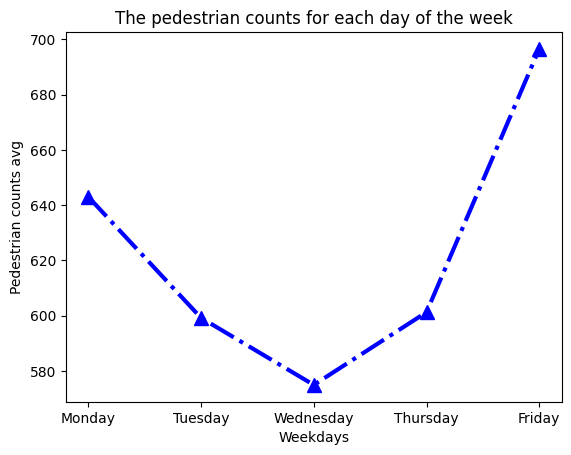

In [40]:
plt.plot(week_label,week_pedestrian_avg,linewidth=3,color='b',linestyle='-.',marker='^', markersize=10)
plt.xlabel('Weekdays')
plt.ylabel('Pedestrian counts avg')
plt.title('The pedestrian counts for each day of the week')
plt.show()

### 2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year.  Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year. 

In [41]:
data_2019 = data.set_index('hour_beginning').loc['2019']


In [42]:
# Conditional Filtering - Brooklyn Bridge
data_2019 = data_2019[data_2019["location"]=="Brooklyn Bridge"]

In [43]:
# Remove samples with missing values
data_2019 = data_2019.dropna(axis=0,subset=['weather_summary'])

In [44]:
data_2019

,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday
hour_beginning,,,,,,,,,,,,
2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-17 06:00:00,Brooklyn Bridge,166,78,88,partly-cloudy-day,76.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday
2019-12-06 20:00:00,Brooklyn Bridge,21,0,21,cloudy,47.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday


In [45]:
data_2019.isnull().any()

location             False
Pedestrians          False
Towards Manhattan    False
Towards Brooklyn     False
weather_summary      False
temperature          False
precipitation        False
lat                  False
long                 False
events                True
Location1            False
weekday              False
dtype: bool

In [46]:
data_2019["weather_summary"].value_counts()

weather_summary
cloudy                 1438
clear-night            1293
partly-cloudy-day      1215
clear-day               968
partly-cloudy-night     845
rain                    443
snow                     26
fog                      20
wind                      4
sleet                     2
Name: count, dtype: int64

In [47]:
# Average number of pedestrians per weather day
summary = data_2019.groupby('weather_summary')['Pedestrians'].mean().reset_index()

In [48]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(summary['Pedestrians'], summary.index)

In [49]:
print("correlation matrix:")
print(correlation_matrix)

correlation matrix:
[[ 1.         -0.22323628]
 [-0.22323628  1.        ]]


### 3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories.  Use this new column to analyze pedestrian activity patterns throughout the day.

In [50]:
def categorize_time_of_day(hour):
    """
    Categorize the time of day into morning, afternoon, evening, and night.
    """
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

In [51]:
data['hour'] = data['hour_beginning'].dt.hour

# Create a new column to store the time period
data['time_of_day'] = data['hour'].apply(categorize_time_of_day)


In [52]:
data

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,hour,time_of_day
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,0,Night
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,22,Evening
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,23,Evening
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,21,Evening
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,3,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,2018-07-12 00:00:00,Brooklyn Bridge,77,39,38,partly-cloudy-night,72.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,0,Night
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday,4,Night
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,6,Morning
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,18,Evening


In [53]:
pedestrian_activity = data.groupby('time_of_day')['Pedestrians'].mean()

# Output the average of the number of pedestrians in each time period
print("The average number of pedestrians in each time period: ")
print(pedestrian_activity)

pedestrian_total = data.groupby('time_of_day')['Pedestrians'].sum()

# Output the total number of pedestrians in each time period
print("\nThe total number of pedestrians in each time period:")
print(pedestrian_total)

The average number of pedestrians in each time period: 
time_of_day
Afternoon    1520.424338
Evening       389.330195
Morning       571.126220
Night          10.836820
Name: Pedestrians, dtype: float64

The total number of pedestrians in each time period:
time_of_day
Afternoon    4360577
Evening      1116599
Morning      1637990
Night          31080
Name: Pedestrians, dtype: int64
